# Star Type Classification / NASA

NASA에서 수집한 별의 유형 분류 DataSet이다.

## Star Type Classification


For comparing all models of ML   
It can be used for prediction

Temperature -- K   
L -- L/Lo  
R -- R/Ro  
AM -- Mv  
Color -- General Color of Spectrum  
Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types  
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants  

TARGET:  
Type

from 0 to 5  

Red Dwarf - 0  
Brown Dwarf - 1  
White Dwarf - 2  
Main Sequence - 3  
Super Giants - 4  
Hyper Giants - 5

MATH:  

Lo = 3.828 x 10^26 Watts  
(Avg Luminosity of Sun)  
Ro = 6.9551 x 10^8 m  
(Avg Radius of Sun)  

## 요약
 요약
Calumns: 온도(K), 광도(L), 반지름(R), AM, 색상, 스펙트럼(Spectral Class), Type (분류)  

![Spectral_Class](https://scienceruls.weebly.com/uploads/5/1/7/4/51741831/846626525.GIF?448)

참고는 Kaggle에서   
https://www.kaggle.com/sohelranaccselab/star-type-classification-using-machine-learning  
https://www.kaggle.com/harshgupta57/star-type-eda-classifications

In [17]:
import pandas as pd
import numpy as np
import os

In [18]:
import matplotlib.pyplot as plt
DATA_PATH = os.path.join('data') # 데이터 저장 폴더

def load_star_data(): # wine data의 csv파일을 return하는 함수
    csv_path = os.path.join(DATA_PATH,'Stars.csv')
    return pd.read_csv(csv_path)

In [19]:
star = load_star_data()
star.info()
Type = star.Type # label만 미리 저장

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [20]:
color_dummy = pd.get_dummies(star.Color)
spectral_dummy = pd.get_dummies(star.Spectral_Class)

star = pd.concat([star,color_dummy,spectral_dummy],axis=1)
star = star.drop(['Color', 'Spectral_Class', 'Type'], axis=1)
star

,Temperature,L,R,A_M,Blue,Blue White,Blue white,Blue-White,Blue-white,Orange,...,white,yellow-white,yellowish,A,B,F,G,K,M,O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
star.describe()

,Temperature,L,R,A_M,Blue,Blue White,Blue white,Blue-White,Blue-white,Orange,...,white,yellow-white,yellowish,A,B,F,G,K,M,O
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,0.233333,0.041667,0.016667,0.004167,0.108333,0.008333,...,0.012500,0.033333,0.008333,0.079167,0.191667,0.070833,0.004167,0.025000,0.462500,0.166667
std,9552.425037,179432.244940,517.155763,10.532512,0.423836,0.200244,0.128287,0.064550,0.311450,0.091096,...,0.111335,0.179881,0.091096,0.270563,0.394435,0.257082,0.064550,0.156451,0.499634,0.373457
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5776.000000,0.070500,0.762500,8.313000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15055.500000,198050.000000,42.750000,13.697500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,40000.000000,849420.000000,1948.500000,20.060000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
#대표적인 Scaler에는 MinMaxScaler, MaxAbsScaler, StandardScaler, RobusScaler 4가지가 있다. + Normalizer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [23]:
MM = MinMaxScaler()
MA = MaxAbsScaler()
SS = StandardScaler()
RS = RobustScaler()
NO = Normalizer()

mm=pd.DataFrame(MM.fit_transform(star),columns=star.columns)
ma=pd.DataFrame(MA.fit_transform(star),columns=star.columns)
ss=pd.DataFrame(SS.fit_transform(star),columns=star.columns)
rs=pd.DataFrame(RS.fit_transform(star),columns=star.columns)
no=pd.DataFrame(NO.fit_transform(star),columns=star.columns)


<function matplotlib.pyplot.show(*args, **kw)>

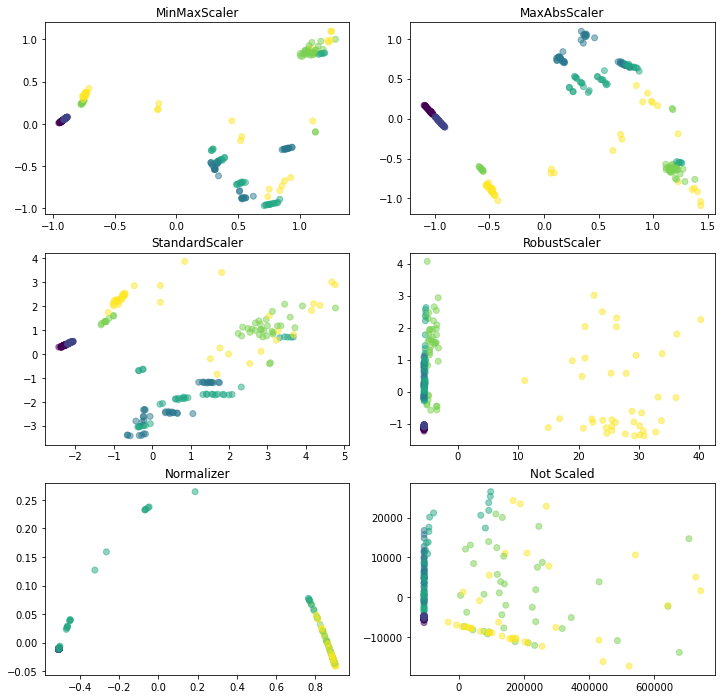

In [24]:
from sklearn.decomposition import PCA

#각 정규화 된 값들을 PCA로 차원축소 시키고 값이 어떻게 변화하는지 살펴본다.
pca = PCA(n_components=2)

mm_pca = pca.fit_transform(mm)
ma_pca = pca.fit_transform(ma)
ss_pca = pca.fit_transform(ss)
rs_pca = pca.fit_transform(rs)
no_pca = pca.fit_transform(no)
ns_pca = pca.fit_transform(star)

mm_pca = pd.DataFrame(mm_pca, columns=['x','y'])
ma_pca = pd.DataFrame(ma_pca, columns=['x','y'])
ss_pca = pd.DataFrame(ss_pca, columns=['x','y'])
rs_pca = pd.DataFrame(rs_pca, columns=['x','y'])
no_pca = pd.DataFrame(no_pca, columns=['x','y'])
ns_pca = pd.DataFrame(ns_pca, columns=['x','y'])

plt.figure(figsize=(12, 12))

plt.subplot(321)
plt.scatter(mm_pca.x, mm_pca.y, alpha=0.5,c=Type)
plt.title('MinMaxScaler')
plt.subplot(322)
plt.scatter(ma_pca.x, ma_pca.y, alpha=0.5,c=Type)
plt.title('MaxAbsScaler')
plt.subplot(323)
plt.scatter(ss_pca.x, ss_pca.y, alpha=0.5,c=Type)
plt.title('StandardScaler')
plt.subplot(324)
plt.scatter(rs_pca.x, rs_pca.y, alpha=0.5,c=Type)
plt.title('RobustScaler')
plt.subplot(325)
plt.scatter(no_pca.x, no_pca.y, alpha=0.5,c=Type)
plt.title('Normalizer')
plt.subplot(326)
plt.scatter(ns_pca.x, ns_pca.y, alpha=0.5,c=Type)
plt.title('Not Scaled')

plt.show